In [ ]:
#OmSaiRam
import tensorflow as tf
from tensorflow import keras
# import tensorflow.keras.preprocessing
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

# import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import cv2
import math
import random
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("Gpu is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.8.2
Hub version: 0.12.0
Gpu is available


---
---

In [ ]:
import pandas as pd
import cv2
import math
import random
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

---

In [ ]:
import zipfile
local_zip = './carhacking.zip'
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/datacarhacking')
zip_ref.close()

<class 'str'>


BadZipFile: ignored

---

In [ ]:
import io

df = pd.read_csv('/content/tmp/datacarhacking/carhacking.csv')
df


,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


---

In [ ]:
df.Label.value_counts()

R        701832
RPM       32539
gear      29944
DoS       29501
Fuzzy     24624
Name: Label, dtype: int64

---

---

In [ ]:
#scale down all the values of the numerics between 0 and 1
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer()
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255)
)
df.describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.00000,818440.000000
mean,177857.956399,14824.857021,11683.357907,10306.053816,20066.007453,13100.343031,15761.076603,6694.90218,13792.541035
std,100114.135989,22887.969864,13876.396964,14921.740234,26111.180561,18646.509200,19712.149872,14620.53158,20435.665598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,86445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,179520.000000,2040.000000,8160.000000,0.000000,5100.000000,4080.000000,8160.000000,0.00000,0.000000
75%,273360.000000,17595.000000,17595.000000,24480.000000,34935.000000,27285.000000,32385.000000,2550.00000,27795.000000
max,521985.000000,65025.000000,65025.000000,65025.000000,65025.000000,65025.000000,65025.000000,65025.00000,65025.000000


---

In [ ]:

#Generate images for each classes
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)


---

In [ ]:
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=243:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(27,27, 3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
#For class 1 RPM Spoofing Attack
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)


for i in range(0, len(df1)):
    count=count+1
    if count<=243:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(27,27,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
#For class 2 Gear Spoofing Attack
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)


for i in range(0, len(df2)):
    count=count+1
    if count<=243:
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(27,27,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

---

In [ ]:
#For class 3 Dos Attack
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):
    count=count+1
    if count<=243:
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(27,27,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

---

In [ ]:
#For class 4 Fuzzy attack
count=0
ims = []

image_path = "train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):
    count=count+1
    if count<=243:
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(27,27,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

---

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

3351


---

From Here We can adjust the size of dataset

In [ ]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=int(len(allimgs)/5) 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

---

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


---

In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

---

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)


Finish resizing


---

In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)


Finish resizing


---

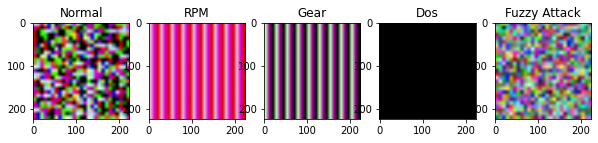

In [ ]:

img1 = Image.open('./train_224/0/10003.png')
img2 = Image.open('./train_224/1/10003.png')
img3 = Image.open('./train_224/2/10003.png')
img4 = Image.open('./train_224/3/10003.png')
img5 = Image.open('./train_224/4/10247.png')

plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Dos")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it

---

---
---
From here actual model begins:

---
---

In this section :-
[1] We'll Generate training and testing images from the dataset in which we have currently created the images

[2] Construct the CNN model [VGG-19]

[3] Do the hyper parameter Optimization also called as hyper parameter tuning

Notebook 2 for CNN model development:-

In [ ]:
#Constructing a CNN Model:-
import os
import tensorflow
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.optimizers import Adam

---

Generating training and testing images:

In [ ]:
TARGET_SIZE = (224,224)
INPUT_SIZE = (224,224,3)
BATCH_SIZE = 128

#Normalizing the values

train_datagen = ImageDataGenerator(rescale =1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    './train_224/',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    './test_224/',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 2681 images belonging to 5 classes.
Found 670 images belonging to 5 classes.


---

Defining the image plotting functions:

Plotting the various graphs for the accuracy, validation accuracy etc.

In [ ]:
class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train accuracy')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val accuracy')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend()
        plt.show()

---

In [ ]:
  history_this = LossHistory()

---

Constructing the CNN model:

In [ ]:
#VGG 19 is used:
import tensorflow as tf
import keras
from keras.applications.vgg19 import VGG19
def vgg19( num_class, epochs,frozen = 19, lr= 0.001, patience = 2,dropout_rate = 0.5, savepath='./VGG19.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))
    for layer in model_fine_tune.layers[:19]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives()])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=4, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy' ,
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        use_multiprocessing=True,
        # workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

---

In [ ]:
vgg19(num_class=5,epochs=10)

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 0.4257 - accuracy: 0.8724 - sensitivity_at_specificity: 0.9851 - false_positives: 201.0000 - true_positives: 2309.0000 - true_negatives: 10523.0000 - false_negatives: 372.0000
Epoch 1: val_accuracy improved from -inf to 0.96866, saving model to ./VGG19.h5
21/21 [==============================] - 65s 2s/step - loss: 0.4257 - accuracy: 0.8724 - sensitivity_at_specificity: 0.9851 - false_positives: 201.0000 - true_positives: 2309.0000 - true_negatives: 10523.0000 - false_negatives: 372.0000 - val_loss: 0.0492 - val_accuracy: 0.9687 - val_sensitivity_at_specificity: 1.0000 - val_false_positives: 0.0000e+00 - val_true_positives: 649.0000 - val_true_negatives: 2680.0000 - val_false_negatives: 21.0000
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9974 - sensitivity_at_specificity: 1.0000 - false_positives: 1.0000 - true

---

The Parameters Calculated at 5th Epoch are as follows:

---

[1] False Positive: 5.00

---

[2] True Positive: 23378.00

---

[3] True Negative: 93527.00

---

[4] False Negative: 5.00

---

[5] FPR (False Positive Rate) = 0.001

---

[6]TPR(True Positive Rate) =

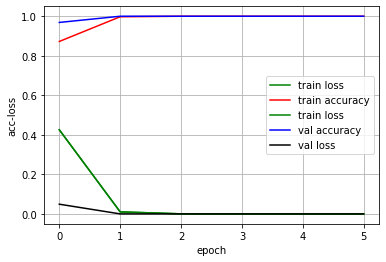

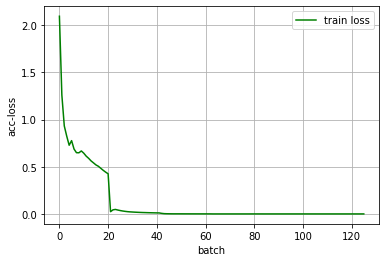

In [ ]:
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

---

---
---
From here testing model starts:

---
---

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

---

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
    './test_224/',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 670 images belonging to 5 classes.


---

In [ ]:
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

---

In [ ]:
print(label)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}


---

In [ ]:
rootdir = './test_224/'
test_laels = []
test_images = []
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    if not(file.endswith(".jpeg"))|(file.endswith(".png"))|(file.endswith(".jpg")):
      continue
    test_laels.append(subdir.split('/')[-1])
    test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

1 ./test_224/1/17079.png


---

In [ ]:
vgg19_model = load_model('./VGG19.h5')

---

3
Predicted result for the first image: DoS
Confidence level: 1.0


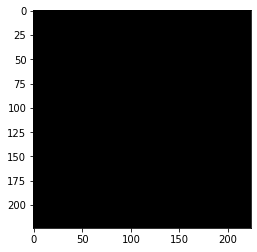

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread('/content/train_224/3/10003.png')
# print(test)
img_show=test[:,:,[2,1,0]]
# print(img_show)
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=vgg19_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print(res)
if res == '4' :
  res = 'Fuzzy'
elif res == '2':
  res = 'Gear'
elif res == '1':
  res = 'RPM'
elif res == '3':
  res = 'DoS'
elif res == '0' :
  res = 'Normal'
else :
  print('invalid image')
# print(type(res))
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

---

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    vgg19_model_batch=vgg19_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=vgg19_model_batch[0,np.argmax(vgg19_model_batch,axis=1)[0]]
    res=label[np.argmax(vgg19_model_batch,axis=1)[0]]
    predict.append(res)


CPU times: user 39.6 s, sys: 1.07 s, total: 40.7 s
Wall time: 40.5 s


---

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
# FPR = tf.metrics.
print('VGG19 accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0','1','2','3','4']
print(classification_report(test_laels, predict, target_names=target_names))

VGG19 accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
[[581   0   0   0   0]
 [  0  27   0   0   0]
 [  0   0  20   0   0]
 [  0   0   0  21   0]
 [  0   0   0   0  21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670



The Above are the various parameters for the testing done.